In [2]:
import bmll2 as b2
import random
import math
import pandas as pd
import numpy as np
from pandas import StringDtype

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import LogFormatterSciNotation

from statsmodels.sandbox.stats.runs import runstest_1samp 
import itertools
import pylab
import scipy.stats
from scipy.optimize import curve_fit

import shutil
from pathlib import Path
import warnings

In [3]:
b2.get_file('test_data/ST_df_power_25.csv')
b2.get_file('test_data/ST_df_power_50.csv')
b2.get_file('test_data/ST_df_power_100.csv')
b2.get_file('test_data/ST_df_power_150.csv')

ST_df_power_25  = pd.read_csv('ST_df_power_25.csv')
ST_df_power_50  = pd.read_csv('ST_df_power_50.csv')
ST_df_power_100 = pd.read_csv('ST_df_power_100.csv')
ST_df_power_150 = pd.read_csv('ST_df_power_150.csv')

In [5]:
STs_percentage_25 = ST_df_power_25['% STs']
STs_vols_25       = ST_df_power_25['STs volume']
STs_nums_25       = ST_df_power_25['STs number']

STs_percentage_50 = ST_df_power_50['% STs']
STs_vols_50       = ST_df_power_50['STs volume']
STs_nums_50       = ST_df_power_50['STs number']

STs_percentage_100 = ST_df_power_100['% STs']
STs_vols_100       = ST_df_power_100['STs volume']
STs_nums_100       = ST_df_power_100['STs number']

STs_percentage_150 = ST_df_power_150['% STs']
STs_vols_150       = ST_df_power_150['STs volume']
STs_nums_150       = ST_df_power_150['STs number']

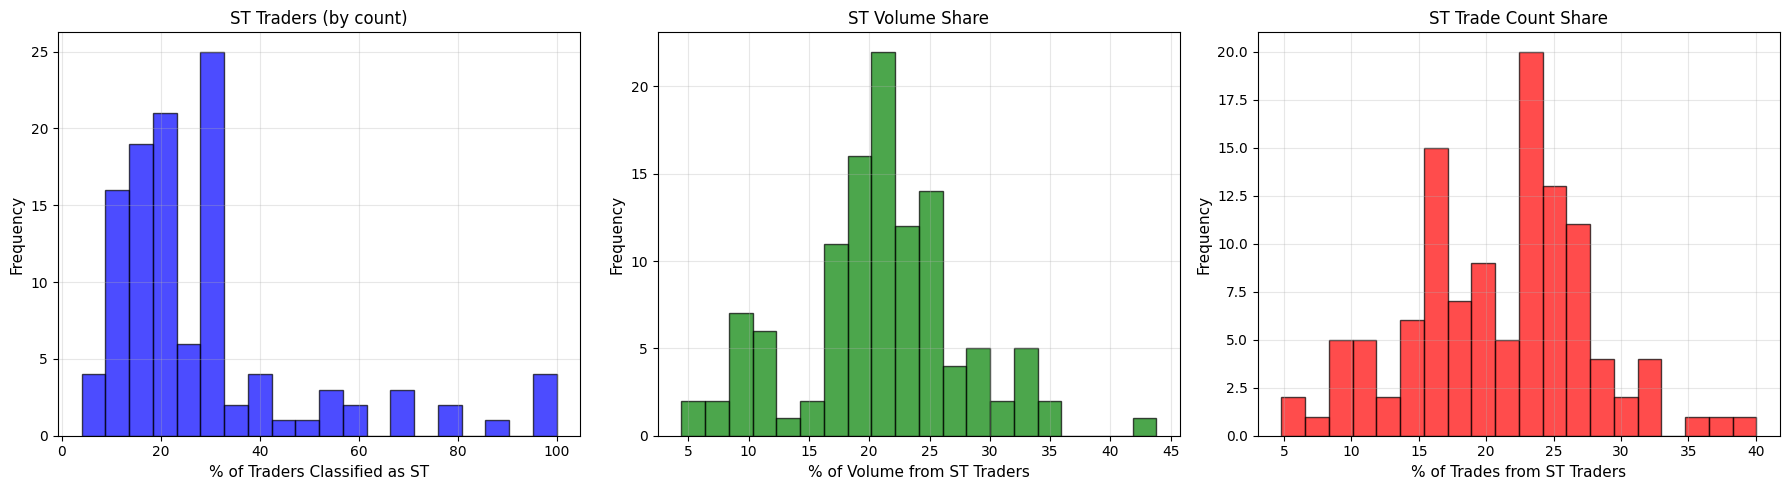

In [23]:
# Create the three histograms
fig, axes = plt.subplots(1, 3, figsize = (18, 5))

# Histogram 1: Percentage of traders identified as ST
axes[0].hist(STs_percentage_25, bins = 20, edgecolor = 'black', alpha = 0.7, color = 'blue')
axes[0].set_xlabel('% of Traders Classified as ST', fontsize = 11)
axes[0].set_ylabel('Frequency', fontsize = 11)
axes[0].set_title('ST Traders (by count)', fontsize = 12)
axes[0].grid(True, alpha = 0.3)

# Histogram 2: Volume percentage
axes[1].hist(STs_vols_25, bins = 20, edgecolor = 'black', alpha = 0.7, color = 'green')
axes[1].set_xlabel('% of Volume from ST Traders', fontsize = 11)
axes[1].set_ylabel('Frequency', fontsize = 11)
axes[1].set_title('ST Volume Share', fontsize = 12)
axes[1].grid(True, alpha = 0.3)

# Histogram 3: Number of trades percentage
axes[2].hist(STs_nums_25, bins = 20, edgecolor = 'black', alpha = 0.7, color = 'red')
axes[2].set_xlabel('% of Trades from ST Traders', fontsize = 11)
axes[2].set_ylabel('Frequency', fontsize = 11)
axes[2].set_title('ST Trade Count Share', fontsize = 12)
axes[2].grid(True, alpha = 0.3)

plt.tight_layout()

plt.savefig('ST_power_25.pdf')
b2.put_file('ST_power_25.pdf', 'figures')
b2.get_file('figures/ST_power_25.pdf')

plt.show()
# Summary statistics
#print(f"Total stock-years analyzed: {len(STs_percentage_25)}")
#print(f"\nST Traders: Mean = {np.mean(STs_percentage_25):.2f}%, Median = {np.median(STs_percentage_25):.2f}%")
#print(f"ST Volume: Mean = {np.mean(STs_vols_25):.2f}%, Median = {np.median(STs_vols_25):.2f}%")
#print(f"ST Trades: Mean = {np.mean(STs_nums_25):.2f}%, Median = {np.median(STs_nums_25):.2f}%")

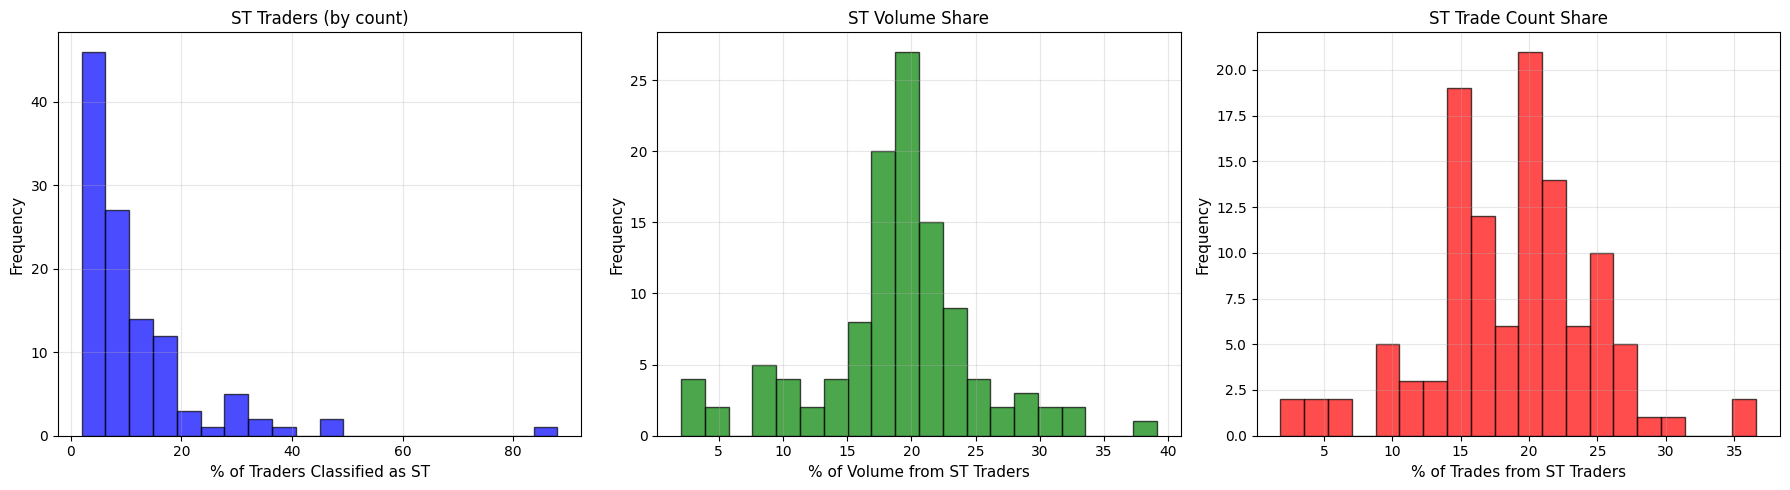

In [24]:
# Create the three histograms
fig, axes = plt.subplots(1, 3, figsize = (18, 5))

# Histogram 1: Percentage of traders identified as ST
axes[0].hist(STs_percentage_50, bins = 20, edgecolor = 'black', alpha = 0.7, color = 'blue')
axes[0].set_xlabel('% of Traders Classified as ST', fontsize = 11)
axes[0].set_ylabel('Frequency', fontsize = 11)
axes[0].set_title('ST Traders (by count)', fontsize = 12)
axes[0].grid(True, alpha = 0.3)

# Histogram 2: Volume percentage
axes[1].hist(STs_vols_50, bins = 20, edgecolor = 'black', alpha = 0.7, color = 'green')
axes[1].set_xlabel('% of Volume from ST Traders', fontsize = 11)
axes[1].set_ylabel('Frequency', fontsize = 11)
axes[1].set_title('ST Volume Share', fontsize = 12)
axes[1].grid(True, alpha = 0.3)

# Histogram 3: Number of trades percentage
axes[2].hist(STs_nums_50, bins = 20, edgecolor = 'black', alpha = 0.7, color = 'red')
axes[2].set_xlabel('% of Trades from ST Traders', fontsize = 11)
axes[2].set_ylabel('Frequency', fontsize = 11)
axes[2].set_title('ST Trade Count Share', fontsize = 12)
axes[2].grid(True, alpha = 0.3)

plt.tight_layout()

plt.savefig('ST_power_50.pdf')
b2.put_file('ST_power_50.pdf', 'figures')
b2.get_file('figures/ST_power_50.pdf')

plt.show()
# Summary statistics
#print(f"Total stock-years analyzed: {len(STs_percentage_50)}")
#print(f"\nST Traders: Mean = {np.mean(STs_percentage_50):.2f}%, Median = {np.median(STs_percentage_50):.2f}%")
#print(f"ST Volume: Mean = {np.mean(STs_vols_50):.2f}%, Median = {np.median(STs_vols_50):.2f}%")
#print(f"ST Trades: Mean = {np.mean(STs_nums_50):.2f}%, Median = {np.median(STs_nums_50):.2f}%")

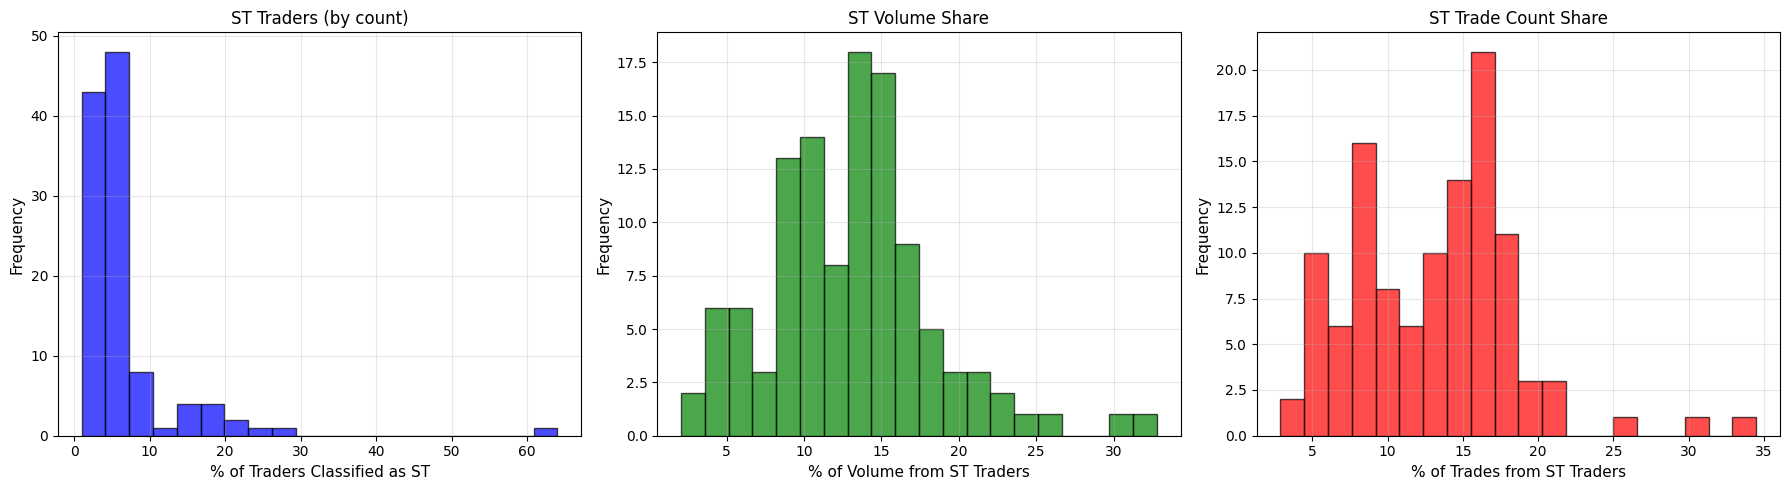

In [25]:
# Create the three histograms
fig, axes = plt.subplots(1, 3, figsize = (18, 5))

# Histogram 1: Percentage of traders identified as ST
axes[0].hist(STs_percentage_100, bins = 20, edgecolor = 'black', alpha = 0.7, color = 'blue')
axes[0].set_xlabel('% of Traders Classified as ST', fontsize = 11)
axes[0].set_ylabel('Frequency', fontsize = 11)
axes[0].set_title('ST Traders (by count)', fontsize = 12)
axes[0].grid(True, alpha = 0.3)

# Histogram 2: Volume percentage
axes[1].hist(STs_vols_100, bins = 20, edgecolor = 'black', alpha = 0.7, color = 'green')
axes[1].set_xlabel('% of Volume from ST Traders', fontsize = 11)
axes[1].set_ylabel('Frequency', fontsize = 11)
axes[1].set_title('ST Volume Share', fontsize = 12)
axes[1].grid(True, alpha = 0.3)

# Histogram 3: Number of trades percentage
axes[2].hist(STs_nums_100, bins = 20, edgecolor = 'black', alpha = 0.7, color = 'red')
axes[2].set_xlabel('% of Trades from ST Traders', fontsize = 11)
axes[2].set_ylabel('Frequency', fontsize = 11)
axes[2].set_title('ST Trade Count Share', fontsize = 12)
axes[2].grid(True, alpha = 0.3)

plt.tight_layout()

plt.savefig('ST_power_100.pdf')
b2.put_file('ST_power_100.pdf', 'figures')
b2.get_file('figures/ST_power_100.pdf')

plt.show()
# Summary statistics
#print(f"Total stock-years analyzed: {len(STs_percentage_100)}")
#print(f"\nST Traders: Mean = {np.mean(STs_percentage_100):.2f}%, Median = {np.median(STs_percentage_100):.2f}%")
#print(f"ST Volume: Mean = {np.mean(STs_vols_100):.2f}%, Median = {np.median(STs_vols_100):.2f}%")
#print(f"ST Trades: Mean = {np.mean(STs_nums_100):.2f}%, Median = {np.median(STs_nums_100):.2f}%")

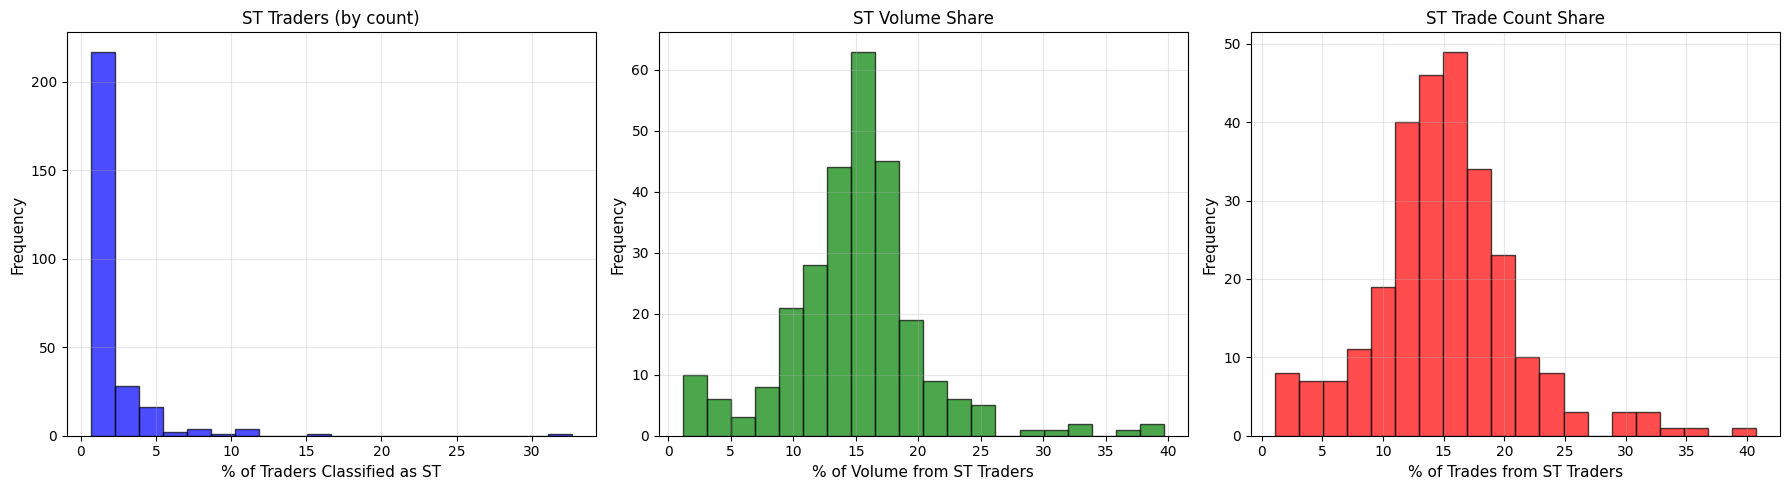

In [6]:
# Create the three histograms
fig, axes = plt.subplots(1, 3, figsize = (18, 5))

# Histogram 1: Percentage of traders identified as ST
axes[0].hist(STs_percentage_150, bins = 20, edgecolor = 'black', alpha = 0.7, color = 'blue')
axes[0].set_xlabel('% of Traders Classified as ST', fontsize = 11)
axes[0].set_ylabel('Frequency', fontsize = 11)
axes[0].set_title('ST Traders (by count)', fontsize = 12)
axes[0].grid(True, alpha = 0.3)

# Histogram 2: Volume percentage
axes[1].hist(STs_vols_150, bins = 20, edgecolor = 'black', alpha = 0.7, color = 'green')
axes[1].set_xlabel('% of Volume from ST Traders', fontsize = 11)
axes[1].set_ylabel('Frequency', fontsize = 11)
axes[1].set_title('ST Volume Share', fontsize = 12)
axes[1].grid(True, alpha = 0.3)

# Histogram 3: Number of trades percentage
axes[2].hist(STs_nums_150, bins = 20, edgecolor = 'black', alpha = 0.7, color = 'red')
axes[2].set_xlabel('% of Trades from ST Traders', fontsize = 11)
axes[2].set_ylabel('Frequency', fontsize = 11)
axes[2].set_title('ST Trade Count Share', fontsize = 12)
axes[2].grid(True, alpha = 0.3)

plt.tight_layout()

plt.savefig('ST_power_150.pdf')
b2.put_file('ST_power_150.pdf', 'figures')
b2.get_file('figures/ST_power_150.pdf')

plt.show()
# Summary statistics
#print(f"Total stock-years analyzed: {len(STs_percentage_100)}")
#print(f"\nST Traders: Mean = {np.mean(STs_percentage_100):.2f}%, Median = {np.median(STs_percentage_100):.2f}%")
#print(f"ST Volume: Mean = {np.mean(STs_vols_100):.2f}%, Median = {np.median(STs_vols_100):.2f}%")
#print(f"ST Trades: Mean = {np.mean(STs_nums_100):.2f}%, Median = {np.median(STs_nums_100):.2f}%")